#Referencev paper - 01Impdoc_ECG_PTBXL_Paper.pdf

In [2]:
import time
import numpy as np
import wfdb
import ast
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def load_raw_data(df, sampling_rate, path):
    # Loading all data with signal and meta information
    if sampling_rate == 100:
        data = [wfdb.rdsamp(path+f) for f in df.filename_lr]
    else:
        data = [wfdb.rdsamp(path+f) for f in df.filename_hr]
    
    # Eliminating meta information. We are selecting only signal value of 12 leads 
    data = np.array([signal for signal, meta in data])
    return data

In [4]:
path = 'ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1/'

In [5]:
#Load Annotation data
Y =pd.read_csv(path+'ptbxl_database.csv', index_col='ecg_id')

In [6]:
Y.columns

Index(['patient_id', 'age', 'sex', 'height', 'weight', 'nurse', 'site',
       'device', 'recording_date', 'report', 'scp_codes', 'heart_axis',
       'infarction_stadium1', 'infarction_stadium2', 'validated_by',
       'second_opinion', 'initial_autogenerated_report', 'validated_by_human',
       'baseline_drift', 'static_noise', 'burst_noise', 'electrodes_problems',
       'extra_beats', 'pacemaker', 'strat_fold', 'filename_lr', 'filename_hr'],
      dtype='object')

In [7]:
num_columns = len(Y.columns)
print("Number of columns is",num_columns)

Number of columns is 27


In [8]:
print(Y.shape)

(21837, 27)


In [9]:
#to check data of first five records
Y.head()

,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,...,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr
ecg_id,,,,,,,,,,,,,,,,,,,,,
1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,sinusrhythmus periphere niederspannung,...,True,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr
2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,sinusbradykardie sonst normales ekg,...,True,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr
3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,sinusrhythmus normales ekg,...,True,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr
4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,sinusrhythmus normales ekg,...,True,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr
5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,sinusrhythmus normales ekg,...,True,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr


In [10]:
# Checking meta data of a single patient
# Metadata contains all information about patient including signal file name and patient id. Using this the sigal file can be found for 
#for a particular patient id.
Y.iloc[0]

patient_id                                                       15709.0
age                                                                 56.0
sex                                                                    1
height                                                               NaN
weight                                                              63.0
nurse                                                                2.0
site                                                                 0.0
device                                                         CS-12   E
recording_date                                       1984-11-09 09:17:34
report                            sinusrhythmus periphere niederspannung
scp_codes                       {'NORM': 100.0, 'LVOLT': 0.0, 'SR': 0.0}
heart_axis                                                           NaN
infarction_stadium1                                                  NaN
infarction_stadium2                                

In [11]:
#load ecg data for patient Y.iloc[0]
# wfdb.rdsamp() returns actual signal data and data information 
test_data,meta_data = wfdb.rdsamp(path+Y.iloc[0].filename_lr)

In [12]:
# Evaluate data on scp_codes column
Y.scp_codes = Y.scp_codes.apply(lambda x: ast.literal_eval(x))
Y.scp_codes 

ecg_id
1                 {'NORM': 100.0, 'LVOLT': 0.0, 'SR': 0.0}
2                             {'NORM': 80.0, 'SBRAD': 0.0}
3                               {'NORM': 100.0, 'SR': 0.0}
4                               {'NORM': 100.0, 'SR': 0.0}
5                               {'NORM': 100.0, 'SR': 0.0}
                               ...                        
21833    {'NDT': 100.0, 'PVC': 100.0, 'VCLVH': 0.0, 'ST...
21834             {'NORM': 100.0, 'ABQRS': 0.0, 'SR': 0.0}
21835                           {'ISCAS': 50.0, 'SR': 0.0}
21836                           {'NORM': 100.0, 'SR': 0.0}
21837                           {'NORM': 100.0, 'SR': 0.0}
Name: scp_codes, Length: 21837, dtype: object

In [13]:
len(test_data)

1000

In [14]:
test_data

array([[-0.119, -0.055,  0.064, ..., -0.026, -0.039, -0.079],
       [-0.116, -0.051,  0.065, ..., -0.031, -0.034, -0.074],
       [-0.12 , -0.044,  0.076, ..., -0.028, -0.029, -0.069],
       ...,
       [ 0.069,  0.   , -0.069, ...,  0.024, -0.041, -0.058],
       [ 0.086,  0.004, -0.081, ...,  0.242, -0.046, -0.098],
       [ 0.022, -0.031, -0.054, ...,  0.143, -0.035, -0.12 ]])

In [15]:
test_data.shape

(1000, 12)

In [16]:
meta_data

{'fs': 100,
 'sig_len': 1000,
 'n_sig': 12,
 'base_date': None,
 'base_time': None,
 'units': ['mV',
  'mV',
  'mV',
  'mV',
  'mV',
  'mV',
  'mV',
  'mV',
  'mV',
  'mV',
  'mV',
  'mV'],
 'sig_name': ['I',
  'II',
  'III',
  'AVR',
  'AVL',
  'AVF',
  'V1',
  'V2',
  'V3',
  'V4',
  'V5',
  'V6'],
 'comments': []}

In [17]:
len(meta_data)

8

In [18]:
print("test_data contains data of {1} leads where each lead has {0} samples".format(*test_data.shape))

test_data contains data of 12 leads where each lead has 1000 samples


In [19]:
sampling_rate=100

# Load raw signal data
X = load_raw_data(Y, sampling_rate, path)

In [20]:
X.shape

(21837, 1000, 12)

In [21]:
print("X has total {0} records of {2} leads having {1} samples in each lead".format(*X.shape))

X has total 21837 records of 12 leads having 1000 samples in each lead


In [22]:
# Getting Superclass data
agg_df = pd.read_csv(path+'scp_statements.csv', index_col=0)

In [23]:
agg_df.shape

(71, 12)

In [24]:
agg_df.head()

,description,diagnostic,form,rhythm,diagnostic_class,diagnostic_subclass,Statement Category,SCP-ECG Statement Description,AHA code,aECG REFID,CDISC Code,DICOM Code
NDT,non-diagnostic T abnormalities,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,non-diagnostic T abnormalities,NaN,NaN,NaN,NaN
NST_,non-specific ST changes,1.0,1.0,NaN,STTC,NST_,Basic roots for coding ST-T changes and abnorm...,non-specific ST changes,145.0,MDC_ECG_RHY_STHILOST,NaN,NaN
DIG,digitalis-effect,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,suggests digitalis-effect,205.0,NaN,NaN,NaN
LNGQT,long QT-interval,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,long QT-interval,148.0,NaN,NaN,NaN
NORM,normal ECG,1.0,NaN,NaN,NORM,NORM,Normal/abnormal,normal ECG,1.0,NaN,NaN,F-000B7


In [25]:
#Unique super classes
agg_df.diagnostic_class.unique()

array(['STTC', 'NORM', 'MI', 'HYP', 'CD', nan], dtype=object)

In [26]:
#Unique sub classes
agg_df.diagnostic_subclass.unique()

array(['STTC', 'NST_', 'NORM', 'IMI', 'AMI', 'LVH', 'LAFB/LPFB', 'ISC_',
       'IRBBB', '_AVB', 'IVCD', 'ISCA', 'CRBBB', 'CLBBB', 'LAO/LAE',
       'ISCI', 'LMI', 'RVH', 'RAO/RAE', 'WPW', 'ILBBB', 'SEHYP', 'PMI',
       nan], dtype=object)

In [27]:
agg_df.groupby(['diagnostic_class','diagnostic_subclass']).size().reset_index().rename(columns={0:'count'})

,diagnostic_class,diagnostic_subclass,count
0,CD,CLBBB,1
1,CD,CRBBB,1
2,CD,ILBBB,1
3,CD,IRBBB,1
4,CD,IVCD,1
5,CD,LAFB/LPFB,2
6,CD,WPW,1
7,CD,_AVB,3
8,HYP,LAO/LAE,1
9,HYP,LVH,1


In [28]:
# Let's check the columns
agg_df.columns

Index(['description', 'diagnostic', 'form', 'rhythm', 'diagnostic_class',
       'diagnostic_subclass', 'Statement Category',
       'SCP-ECG Statement Description', 'AHA code', 'aECG REFID', 'CDISC Code',
       'DICOM Code'],
      dtype='object')

In [29]:
# Checking Single Data
agg_df.iloc[0]

description                         non-diagnostic T abnormalities
diagnostic                                                     1.0
form                                                           1.0
rhythm                                                         NaN
diagnostic_class                                              STTC
diagnostic_subclass                                           STTC
Statement Category               other ST-T descriptive statements
SCP-ECG Statement Description       non-diagnostic T abnormalities
AHA code                                                       NaN
aECG REFID                                                     NaN
CDISC Code                                                     NaN
DICOM Code                                                     NaN
Name: NDT, dtype: object

In [30]:
# Only keep the rows that has agg_df.diagnostic == 1, this means diagnostinc report available
agg_df = agg_df[agg_df.diagnostic == 1]
agg_df

,description,diagnostic,form,rhythm,diagnostic_class,diagnostic_subclass,Statement Category,SCP-ECG Statement Description,AHA code,aECG REFID,CDISC Code,DICOM Code
NDT,non-diagnostic T abnormalities,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,non-diagnostic T abnormalities,NaN,NaN,NaN,NaN
NST_,non-specific ST changes,1.0,1.0,NaN,STTC,NST_,Basic roots for coding ST-T changes and abnorm...,non-specific ST changes,145.0,MDC_ECG_RHY_STHILOST,NaN,NaN
DIG,digitalis-effect,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,suggests digitalis-effect,205.0,NaN,NaN,NaN
LNGQT,long QT-interval,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,long QT-interval,148.0,NaN,NaN,NaN
NORM,normal ECG,1.0,NaN,NaN,NORM,NORM,Normal/abnormal,normal ECG,1.0,NaN,NaN,F-000B7
IMI,inferior myocardial infarction,1.0,NaN,NaN,MI,IMI,Myocardial Infarction,inferior myocardial infarction,161.0,NaN,NaN,NaN
ASMI,anteroseptal myocardial infarction,1.0,NaN,NaN,MI,AMI,Myocardial Infarction,anteroseptal myocardial infarction,165.0,NaN,NaN,NaN
LVH,left ventricular hypertrophy,1.0,NaN,NaN,HYP,LVH,Ventricular Hypertrophy,left ventricular hypertrophy,142.0,NaN,C71076,NaN
LAFB,left anterior fascicular block,1.0,NaN,NaN,CD,LAFB/LPFB,Intraventricular and intra-atrial Conduction d...,left anterior fascicular block,101.0,MDC_ECG_BEAT_BLK_ANT_L_HEMI,C62267,D3-33140
ISC_,non-specific ischemic,1.0,NaN,NaN,STTC,ISC_,Basic roots for coding ST-T changes and abnorm...,ischemic ST-T changes,226.0,NaN,NaN,NaN


In [31]:
agg_df.index

Index(['NDT', 'NST_', 'DIG', 'LNGQT', 'NORM', 'IMI', 'ASMI', 'LVH', 'LAFB',
       'ISC_', 'IRBBB', '1AVB', 'IVCD', 'ISCAL', 'CRBBB', 'CLBBB', 'ILMI',
       'LAO/LAE', 'AMI', 'ALMI', 'ISCIN', 'INJAS', 'LMI', 'ISCIL', 'LPFB',
       'ISCAS', 'INJAL', 'ISCLA', 'RVH', 'ANEUR', 'RAO/RAE', 'EL', 'WPW',
       'ILBBB', 'IPLMI', 'ISCAN', 'IPMI', 'SEHYP', 'INJIN', 'INJLA', 'PMI',
       '3AVB', 'INJIL', '2AVB'],
      dtype='object')

In [32]:
#Adding diagnostic superclass to y data
def aggregate_diagnostic(y_dic):
    tmp = []
    for key in y_dic.keys():
        if key in agg_df.index:
            tmp.append(agg_df.loc[key].diagnostic_class)
    return list(set(tmp))

# Apply diagnostic superclass
"""
If the dict keys in Y.scp_codes are available in agg_diff index, put them in diagnostic_superclass
 - This means scp_statements.csv contains diagnostic class in the first column
"""
Y['diagnostic_superclass'] = Y.scp_codes.apply(aggregate_diagnostic)

In [33]:
Y.columns

Index(['patient_id', 'age', 'sex', 'height', 'weight', 'nurse', 'site',
       'device', 'recording_date', 'report', 'scp_codes', 'heart_axis',
       'infarction_stadium1', 'infarction_stadium2', 'validated_by',
       'second_opinion', 'initial_autogenerated_report', 'validated_by_human',
       'baseline_drift', 'static_noise', 'burst_noise', 'electrodes_problems',
       'extra_beats', 'pacemaker', 'strat_fold', 'filename_lr', 'filename_hr',
       'diagnostic_superclass'],
      dtype='object')

In [34]:
Y.shape

(21837, 28)

In [35]:
# Let's look at shape of X and Y data
print(X.shape, Y.shape)
print("This means that each ecg_id in Y has corresponding indetical signal in X")

(21837, 1000, 12) (21837, 28)
This means that each ecg_id in Y has corresponding indetical signal in X


<AxesSubplot:>

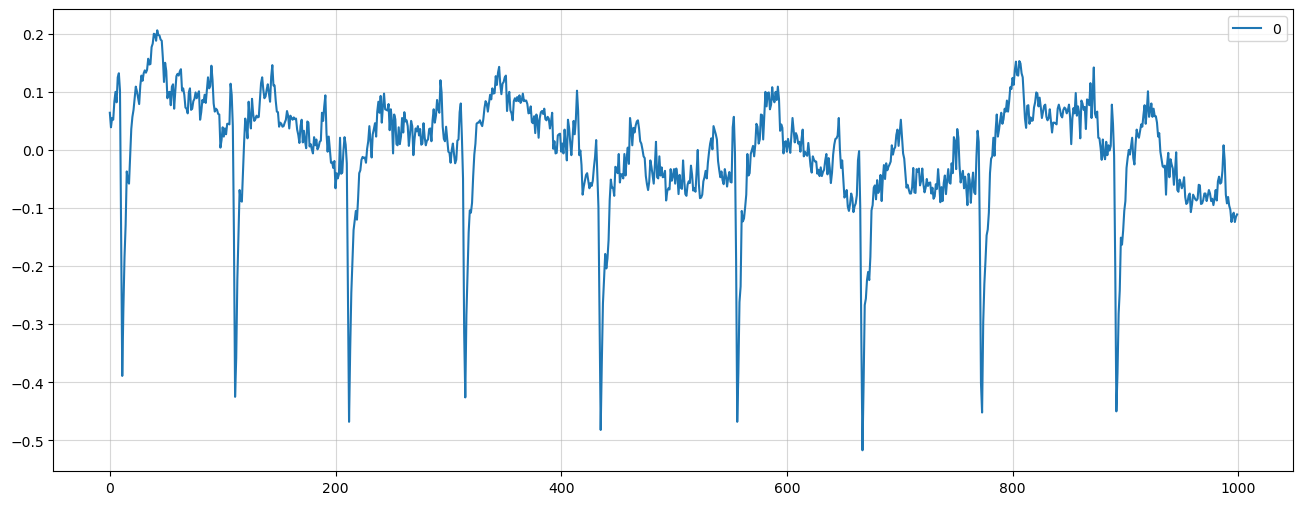

In [56]:
# let's pick an arbitrary signal and it's information from Y index_column
ecg_record = 1239

X[ecg_record][:,0]
Lead_I_data = X[ecg_record][:,5] # Index of Lead. It is available in meta_data information
#ecg_info = Y.iloc[ecg_record]
pd.DataFrame(Lead_I_data).plot(figsize=(16,6))
#print(ecg_info)
#print(Lead_I_data)

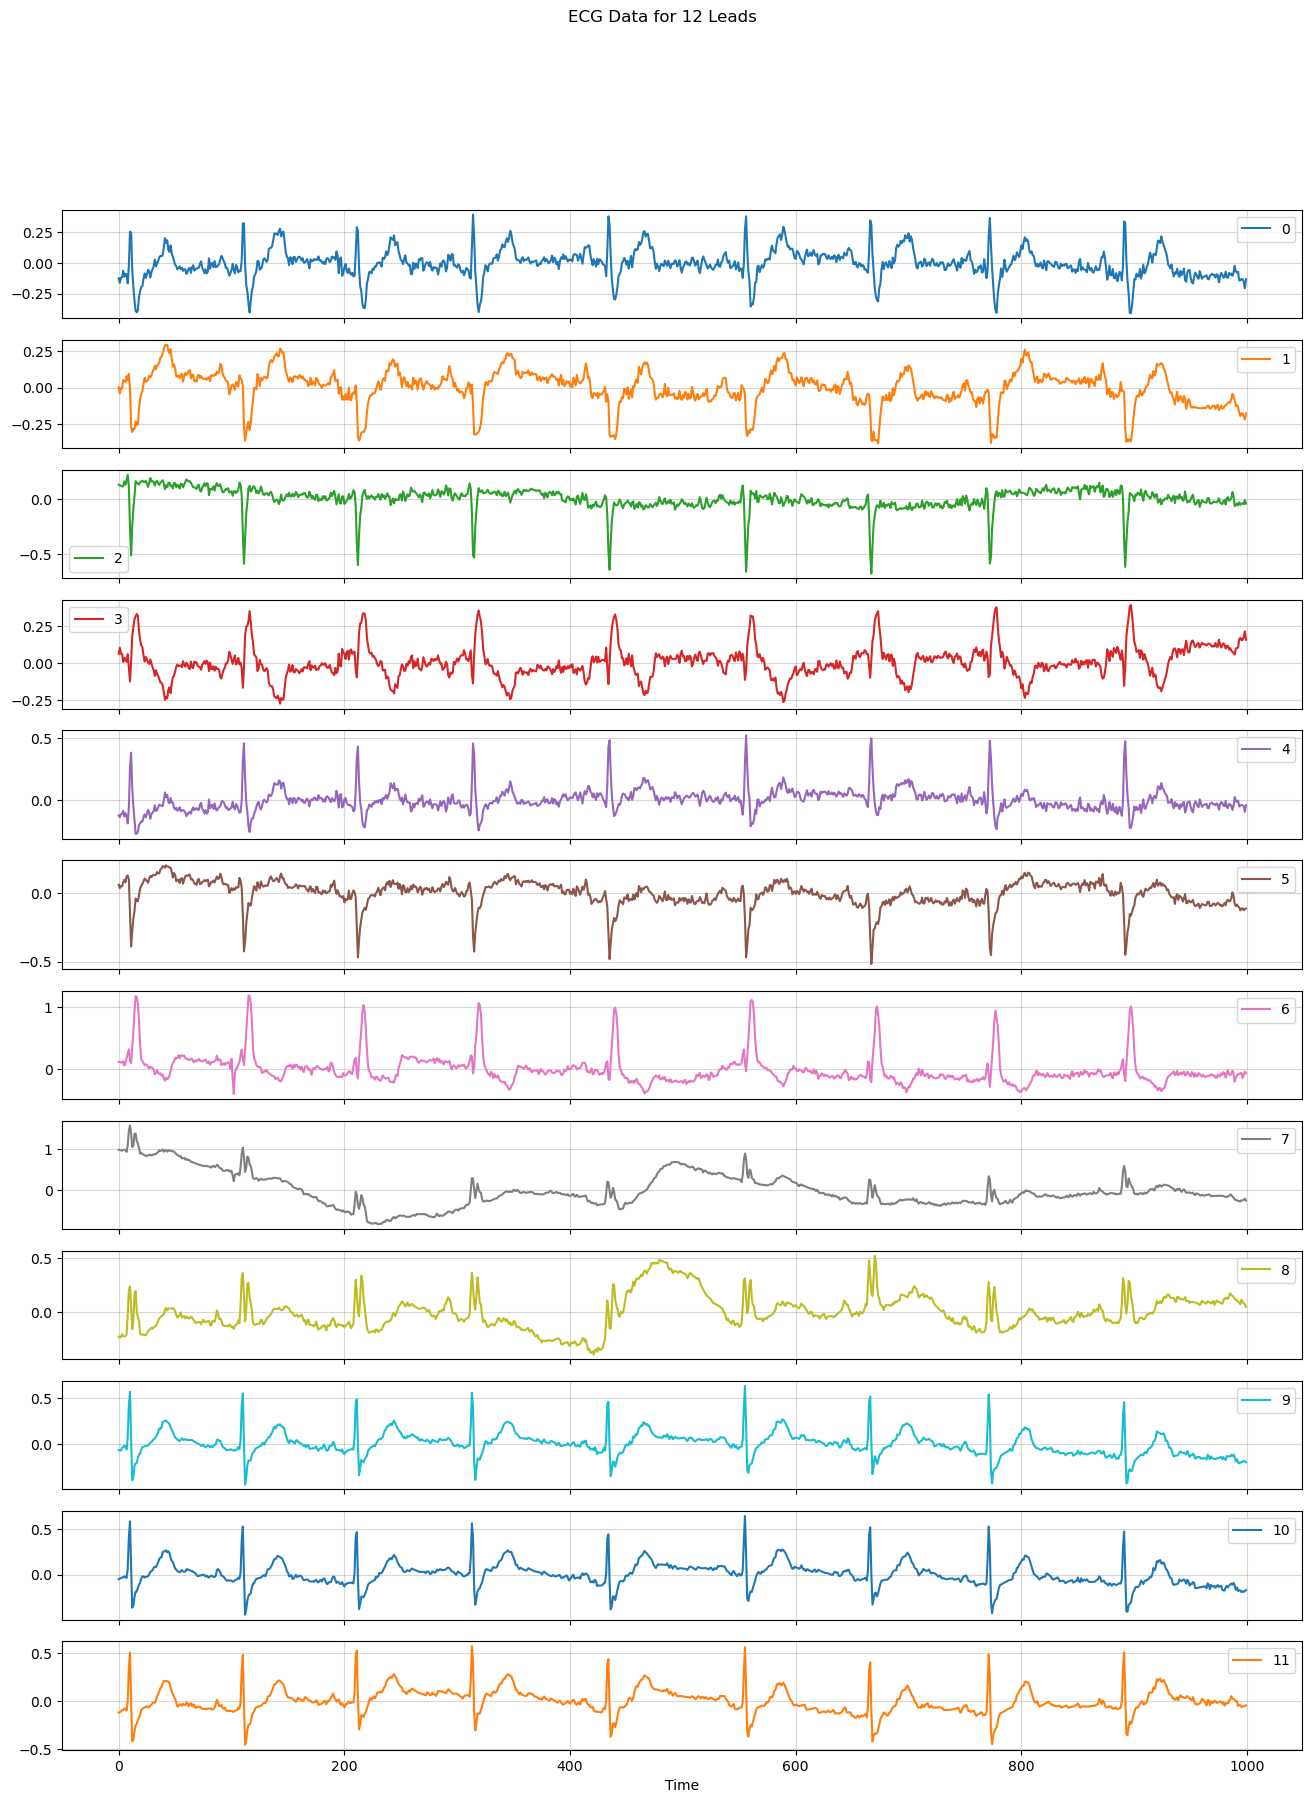

In [53]:
Lead_II_data = X[ecg_record] # Index of Lead. It is available in meta_data information
pd.DataFrame(Lead_II_data).plot(subplots=True,figsize=(16,20),title='ECG Data for 12 Leads',
                               xlabel = 'Time')
plt.savefig('ECGforallLeads.png')


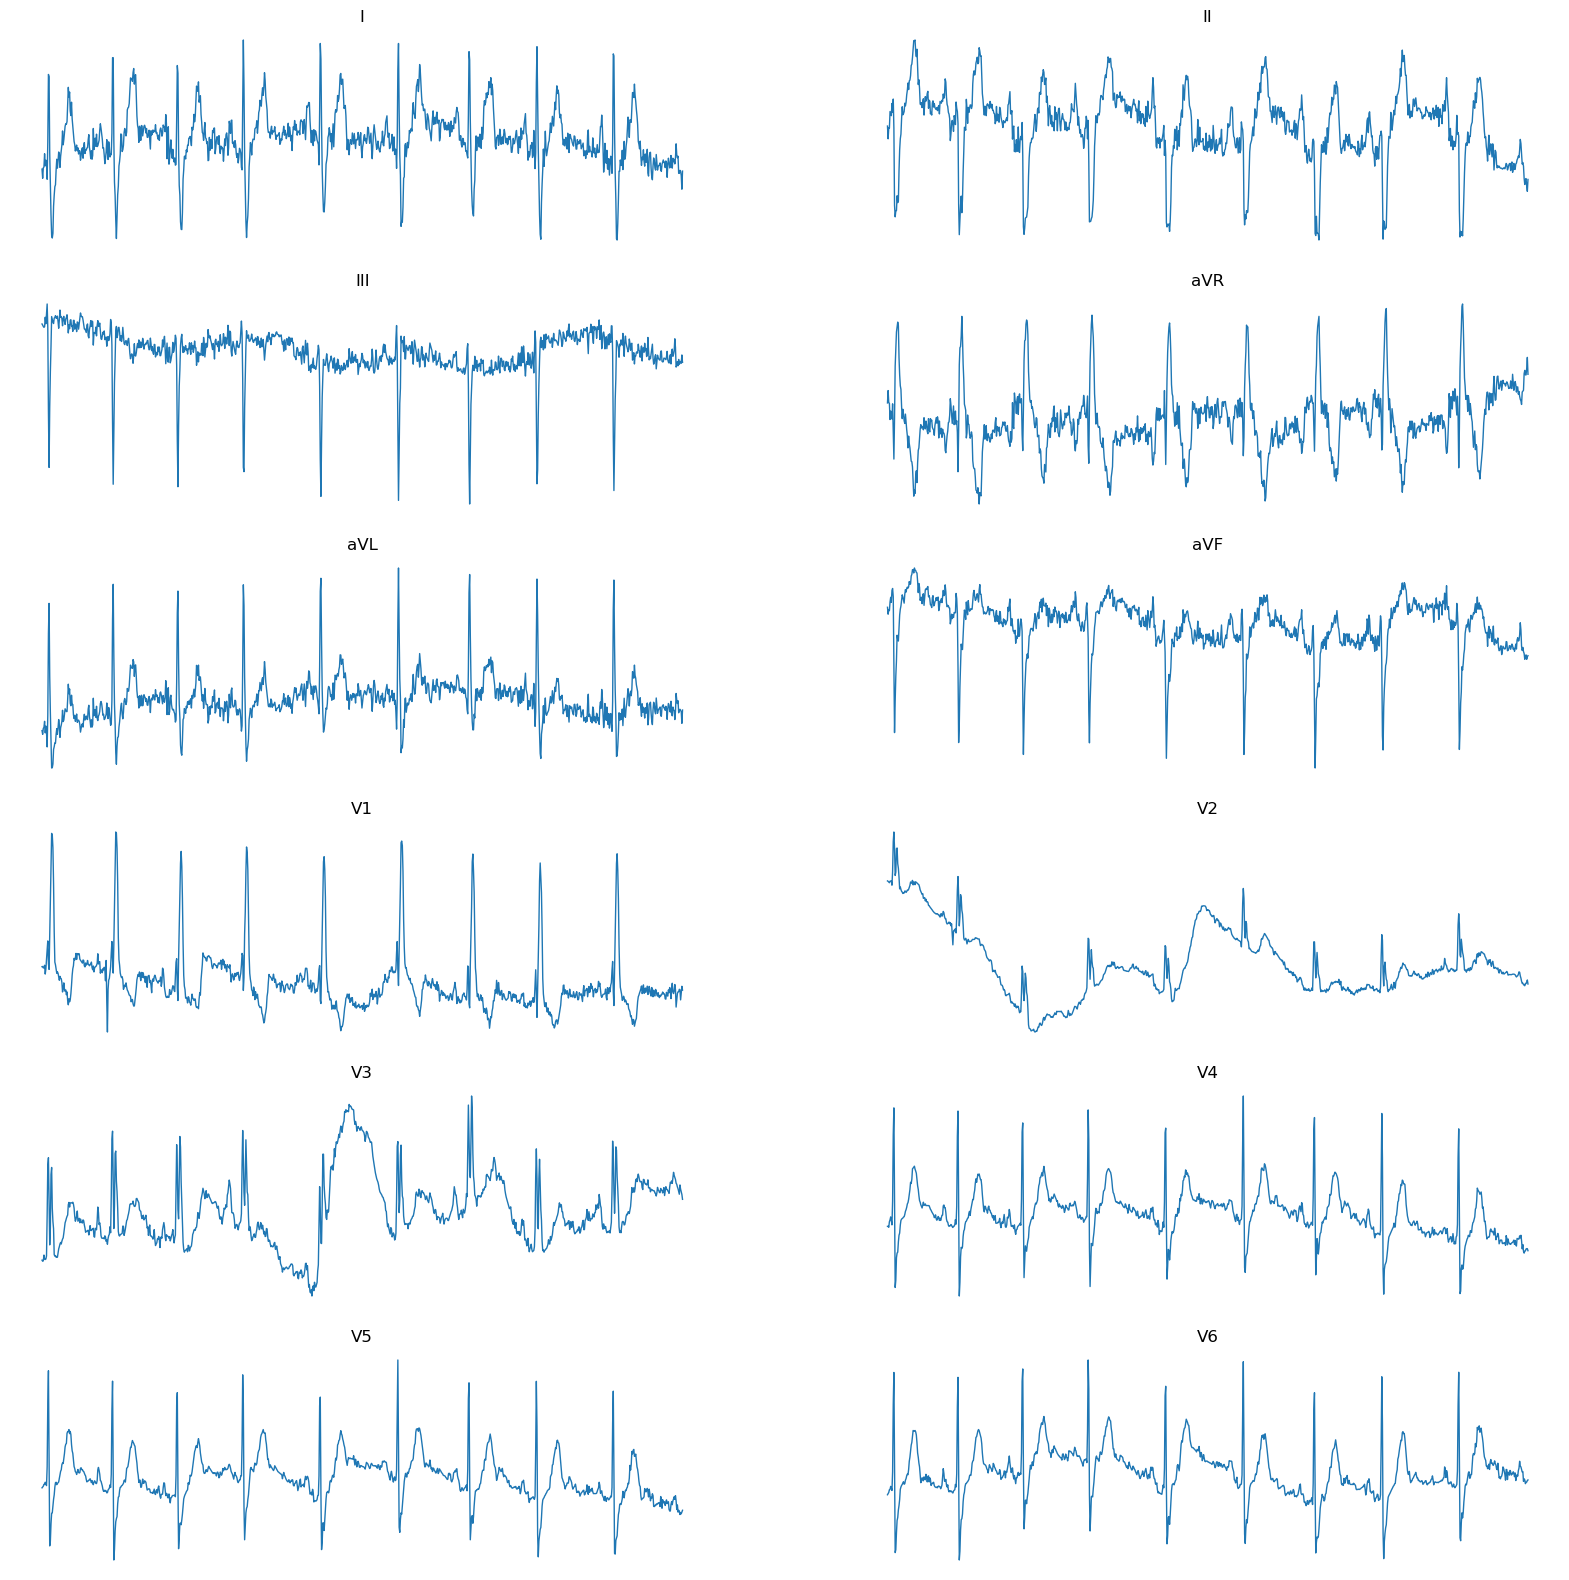

In [39]:
ecg = X[1239]
titles = ["I", "II", "III", "aVR", "aVL", "aVF", "V1", "V2", "V3", "V4", "V5", "V6"]
plt.rcParams['figure.figsize'] = (20.0, 20.0)
plt.rcParams["axes.grid"] = True
plt.rcParams["grid.linestyle"] = (0.1,0.1)
plt.figure()
for index in range(12):
    plt.subplot(6,2,index+1)
    plt.plot(ecg[:,index], linewidth=1)  
    # plt.yticks(np.arange(np.min(ecg[:,index]), np.max(ecg[:,index]), 0.1))
    plt.gca()
    plt.title(titles[index])
    plt.axis('off')
    
plt.show()